# 风场数据聚合成每6小时均值

In [3]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'C:\Users\11712\notebook所有\EC\5\第一个场ID01\每天预报的前四条\风场数据聚合成每6小时均值\train_ID01.csv')

# 假设时间列名为 'timestamp'，风速列名为 'wind_speed'
# 将时间列转换为datetime类型
df['date_time'] = pd.to_datetime(df['date_time'])

# 设置时间列为索引
df.set_index('date_time', inplace=True)

# 按6小时聚合数据，使用均值作为聚合方法
aggregated_df = df.resample('6H', offset='0H').mean()

# 只保留00:00, 06:00, 12:00, 18:00的时间点
aggregated_df = aggregated_df[aggregated_df.index.hour.isin([0, 6, 12, 18])]

# 重置索引，将时间列还原为普通列
aggregated_df.reset_index(inplace=True)

# 保存结果到当前目录下的CSV文件
aggregated_df.to_csv('aggregated_wind_data.csv', index=False)

print("聚合后的数据已保存到当前目录下的 'aggregated_wind_data.csv' 文件中。")

聚合后的数据已保存到当前目录下的 'aggregated_wind_data.csv' 文件中。


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train-11.csv')

# 假设数据包含 'date_time' 和其他风场的风速列
data['date_time'] = pd.to_datetime(data['date_time'])  # 确保时间列是 datetime 类型
data.set_index('date_time', inplace=True)  # 将时间列设置为索引

# 筛选出2023年06月01日到2024年06月30日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

In [25]:

# 按小时聚合，计算每小时的平均风速
filtered_data = filtered_data.resample('H').mean()

# 如果需要其他统计量，可以使用以下方法：
# hourly_max = data.resample('H').max()  # 每小时最大值
# hourly_min = data.resample('H').min()  # 每小时最小值
# hourly_sum = data.resample('H').sum()  # 每小时总和

print(filtered_data.head())

                     wind_obs1  wind_obs2  wind_obs3  wind_obs7  wind_obs10  \
date_time                                                                     
2023-06-30 00:00:00   5.043567   5.560556   4.743219   4.559072    4.256937   
2023-06-30 01:00:00        NaN        NaN        NaN        NaN         NaN   
2023-06-30 02:00:00        NaN        NaN        NaN        NaN         NaN   
2023-06-30 03:00:00        NaN        NaN        NaN        NaN         NaN   
2023-06-30 04:00:00        NaN        NaN        NaN        NaN         NaN   

                     wind_obs15  wind_obs16  wind_obs17  wind_obs19  \
date_time                                                             
2023-06-30 00:00:00    5.358345    4.925531    5.577565     5.08894   
2023-06-30 01:00:00         NaN         NaN         NaN         NaN   
2023-06-30 02:00:00         NaN         NaN         NaN         NaN   
2023-06-30 03:00:00         NaN         NaN         NaN         NaN   
2023-06-30 04:00:00 

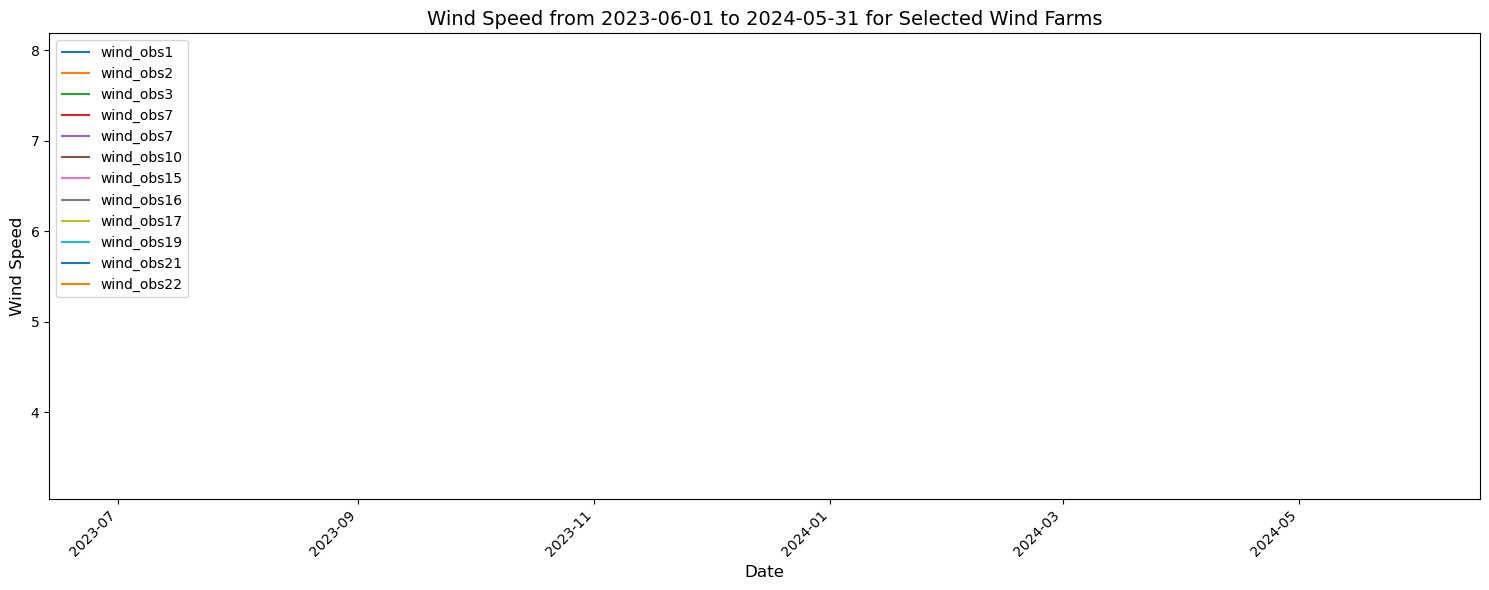

In [26]:
# 指定要绘制的三列风场数据（假设列名为 'wind_speed_1', 'wind_speed_2', 'wind_speed_3'）
columns_to_plot = ['wind_obs1', 'wind_obs2', 'wind_obs3', 'wind_obs7', 'wind_obs7', 'wind_obs10', 'wind_obs15', 'wind_obs16', 'wind_obs17', 'wind_obs19', 'wind_obs21','wind_obs22']

# 绘制时间与指定三列风速的关系图
plt.figure(figsize=(15, 6))  # 设置图形大小

# 循环绘制每一列的风速
for column in columns_to_plot:
    plt.plot(filtered_data.index, filtered_data[column], label=column)

# 添加标题和标签
plt.title('Wind Speed from 2023-06-01 to 2024-05-31 for Selected Wind Farms', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)

# 添加图例
plt.legend(fontsize=10)

# 格式化x轴的时间标签
plt.gcf().autofmt_xdate()  # 自动旋转日期标签，避免重叠
plt.xticks(rotation=45)  # 旋转x轴标签，便于阅读

# 显示图形
plt.tight_layout()  # 调整布局
plt.show()

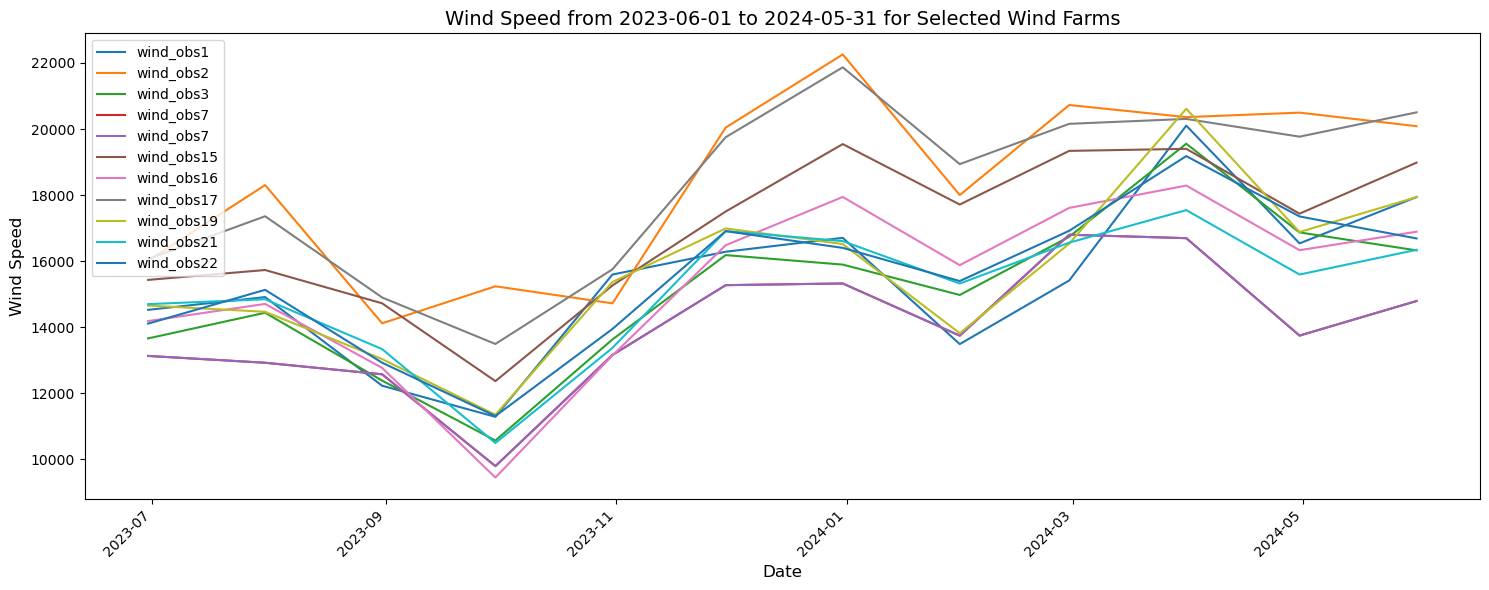

In [29]:
#按月聚合平均、最大值、总和
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
data = pd.read_csv(r'C:\Users\11712\notebook所有\Untitled Folder\train\train-11.csv')

# 假设数据包含 'date_time' 和其他风场的风速列
data['date_time'] = pd.to_datetime(data['date_time'])  # 确保时间列是 datetime 类型
data.set_index('date_time', inplace=True)  # 将时间列设置为索引

# 筛选出2023年06月01日到2024年06月30日的数据
start_date = '2023-06-01 00:00:00'
end_date = '2024-05-31 23:45:00'
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]


# 按小时聚合，计算每小时的平均风速
filtered_data = filtered_data.resample('M').sum()

# 如果需要其他统计量，可以使用以下方法：
# hourly_max = data.resample('H').max()  # 每小时最大值
# hourly_min = data.resample('H').min()  # 每小时最小值
# hourly_sum = data.resample('H').sum()  # 每小时总和


# 指定要绘制的三列风场数据（假设列名为 'wind_speed_1', 'wind_speed_2', 'wind_speed_3'）
columns_to_plot = ['wind_obs1', 'wind_obs2', 'wind_obs3', 'wind_obs7', 'wind_obs7', 'wind_obs15', 'wind_obs16', 'wind_obs17', 'wind_obs19', 'wind_obs21','wind_obs22']

# 绘制时间与指定三列风速的关系图
plt.figure(figsize=(15, 6))  # 设置图形大小

# 循环绘制每一列的风速
for column in columns_to_plot:
    plt.plot(filtered_data.index, filtered_data[column], label=column)

# 添加标题和标签
plt.title('Wind Speed from 2023-06-01 to 2024-05-31 for Selected Wind Farms', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)

# 添加图例
plt.legend(fontsize=10)

# 格式化x轴的时间标签
plt.gcf().autofmt_xdate()  # 自动旋转日期标签，避免重叠
plt.xticks(rotation=45)  # 旋转x轴标签，便于阅读

# 显示图形
plt.tight_layout()  # 调整布局
plt.show()